In [ ]:
import warnings as Nws_Fkewss
Nws_Fkewss.filterwarnings("ignore")
import pandas as Nws_Fkepnn

In [ ]:
Nws_Fke = Nws_Fkepnn.read_csv('FA-KES-Dataset.csv', encoding='unicode_escape')
Nws_Fke

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0
...,...,...,...,...,...,...,...
799,1965511221,Turkish Bombardment Kills 20 Civilians in Syria,28-08-2016 Turkish Bombardment Kills 20 Civili...,manar,8/28/2016,aleppo,1
800,1965511222,Martyrs as Terrorists Shell Aleppos Salah Eddin,17-08-2016 Martyrs as Terrorists Shell Aleppos...,manar,8/1/2016,aleppo,1
801,1965511224,Chemical Attack Kills Five Syrians in Aleppo SANA,03-08-2016 Chemical Attack Kills Five Syrians ...,manar,8/3/2016,aleppo,0
802,1965511226,5 Killed as Russian Military Chopper Shot down...,01-08-2016 5 Killed as Russian Military Choppe...,manar,8/1/2016,idlib,1


In [ ]:
Nws_Fke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unit_id          804 non-null    int64 
 1   article_title    804 non-null    object
 2   article_content  804 non-null    object
 3   source           804 non-null    object
 4   date             804 non-null    object
 5   location         804 non-null    object
 6   labels           804 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 44.1+ KB


In [ ]:
Nws_Fke.nunique()

unit_id            792
article_title      774
article_content    789
source              15
date               423
location            12
labels               2
dtype: int64

In [ ]:
Nws_Fke['labels'].value_counts()

1    426
0    378
Name: labels, dtype: int64

In [ ]:
## remove unwanted column
Nws_Fke= Nws_Fke.drop(['unit_id','article_title','source','date','location'], axis=1)

In [ ]:
Nws_Fke

,article_content,labels
0,Wed 05 Apr 2017 Syria attack symptoms consiste...,0
1,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,0
2,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,0
3,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,0
4,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,0
...,...,...
799,28-08-2016 Turkish Bombardment Kills 20 Civili...,1
800,17-08-2016 Martyrs as Terrorists Shell Aleppos...,1
801,03-08-2016 Chemical Attack Kills Five Syrians ...,0
802,01-08-2016 5 Killed as Russian Military Choppe...,1


In [ ]:
## predict null values
Nws_Fke.isnull().values.sum()

0

In [ ]:
## check duplicate
Nws_FkeD = Nws_Fke[Nws_Fke.duplicated()]
Nws_FkeD

,article_content,labels
300,Last updated at Jul 012016 BEIRUT At least 70 ...,1
315,15 Apr 2017 The attack took place as thousands...,0
374,Published July 5 2016 A motorcycle bomber kill...,1
463,18 November 2016 6 citizens killed 22 injured ...,0
464,18 November 2016 6 citizens killed 22 injured ...,0
545,20 November 2016 10 people mostly schoolchildr...,1


In [ ]:
Nws_Fke=Nws_Fke.drop_duplicates()

In [ ]:
Nws_Fke.shape

(798, 2)

In [ ]:
## Countplot for output column
import seaborn as Nws_Fkese
import matplotlib.pyplot as Nws_Fkema

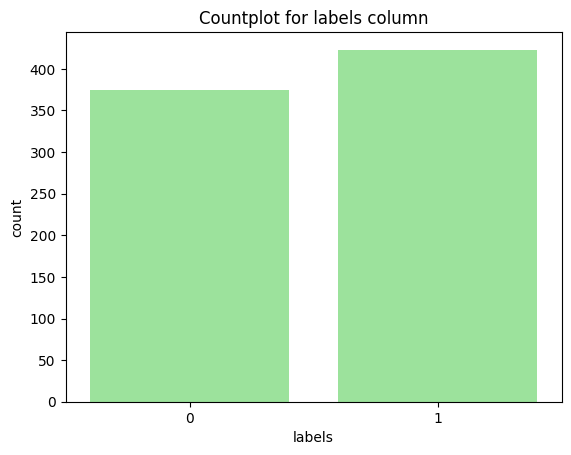

In [ ]:
Nws_Fkese.countplot(x ='labels', data = Nws_Fke,color='lightgreen')
Nws_Fkema.title("Countplot for labels column")
Nws_Fkema.show()

 **real(1) or fake(0)
 ** fake news are less in count.

In [ ]:
## Removing stopwards
import nltk as Nws_Fkenl
Nws_Fkenl.download('stopwords')
import regex as Nws_Fkerg
from nltk.corpus import stopwords as Nws_Fkesw
Nws_Fkesw_H = Nws_Fkesw.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def Fke_de(nw):
    nw = nw.lower()
    nw = Nws_Fkerg.sub("[^a-z]+", " ", nw)
    nw = " ".join([m for m in nw.split() if m not in Nws_Fkesw_H])
    return nw

In [ ]:
nw_D=[]
for ax in Nws_Fke['article_content']:
    nw_D.append(Fke_de(ax))
nw_D[:20]

['wed apr syria attack symptoms consistent nerve agent use victims suspected chemical attack syria appeared show symptoms consistent reaction nerve agent world health organization said wednesday cases appear show additional signs consistent exposure organophosphorus chemicals category chemicals includes nerve agents said statement putting death toll least united states said deaths caused sarin nerve gas dropped syrian aircraft russia said believes poison gas leaked rebel chemical weapons depot struck syrian bombs sarin organophosporus compound nerve agent chlorine mustard gas also believed used past syria russian defence ministry spokesman say agent used attack said rebels used chemical weapons aleppo last year said likely kind chemical used attack sufferers apparent external injuries died rapid onset similar symptoms including acute respiratory distress said experts turkey giving guidance overwhelmed health workers idlib diagnosis treatment patients medicines atropine antidote types c

In [ ]:
Nws_Fke['article_content']=nw_D
Nws_Fke

,article_content,labels
0,wed apr syria attack symptoms consistent nerve...,0
1,fri apr homs governor says u attack caused dea...,0
2,sun apr death toll aleppo bomb attack least de...,0
3,wed apr aleppo bomb blast kills six syrian sta...,0
4,sun jul syria rebels dead fighting key aleppo ...,0
...,...,...
799,turkish bombardment kills civilians syria turk...,1
800,martyrs terrorists shell aleppos salah eddin s...,1
801,chemical attack kills five syrians aleppo sana...,0
802,killed russian military chopper shot syria fiv...,1


In [ ]:
Nws_Fke.to_csv('purr_FA-KES-Dataset.csv', index=False)